In [5]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/padang.zip'
extracted_folder_path = '/mnt/data/padang'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# List the extracted files to see the contents
extracted_files = os.listdir(extracted_folder_path)
extracted_files


['dataset_padang_food']

In [6]:
# Listing the contents of the dataset_padang_food directory
dataset_folder_path = os.path.join(extracted_folder_path, 'dataset_padang_food')
dataset_contents = os.listdir(dataset_folder_path)
dataset_contents

['gulai_ikan',
 'dendeng_batokok',
 'gulai_tunjang',
 'ayam_pop',
 'telur_balado',
 'gulai_tambusu',
 'telur_dadar',
 'ayam_goreng',
 'daging_rendang']

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set paths
base_dir = '/mnt/data/padang/dataset_padang_food'

# Parameters
img_height, img_width = 150, 150
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 20% validation split

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Set as validation data

Found 799 images belonging to 9 classes.
Found 194 images belonging to 9 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
epochs = 25

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/25
24/24 [==============================] - 16s 413ms/step - loss: 2.6177 - accuracy: 0.1408 - val_loss: 2.1298 - val_accuracy: 0.1354
Epoch 2/25
24/24 [==============================] - 9s 374ms/step - loss: 2.0076 - accuracy: 0.2425 - val_loss: 1.7825 - val_accuracy: 0.3698
Epoch 3/25
24/24 [==============================] - 10s 401ms/step - loss: 1.6502 - accuracy: 0.3742 - val_loss: 1.4351 - val_accuracy: 0.4427
Epoch 4/25
24/24 [==============================] - 10s 434ms/step - loss: 1.4905 - accuracy: 0.4141 - val_loss: 1.2991 - val_accuracy: 0.5104
Epoch 5/25
24/24 [==============================] - 12s 490ms/step - loss: 1.3325 - accuracy: 0.5072 - val_loss: 1.2382 - val_accuracy: 0.5677
Epoch 6/25
24/24 [==============================] - 9s 362ms/step - loss: 1.3035 - accuracy: 0.5117 - val_loss: 1.2642 - val_accuracy: 0.4948
Epoch 7/25
24/24 [==============================] - 9s 378ms/step - loss: 1.2189 - accuracy: 0.5450 - val_loss: 1.1490 - val_accuracy: 0.5938
Ep

7/7 [==============================] - 3s 368ms/step - loss: 1.2820 - accuracy: 0.6546
Validation accuracy: 65.46%


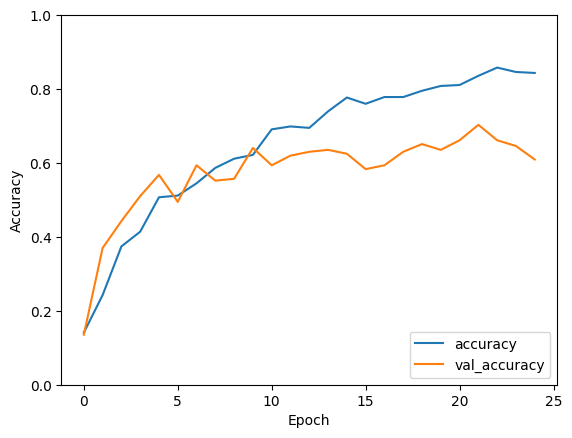

In [10]:
import matplotlib.pyplot as plt

# Evaluate the model
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {validation_accuracy*100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set paths
base_dir = '/content/padang.zip'
extract_dir = '/content/padang'

with zipfile.ZipFile(base_dir, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Parameters
img_height, img_width = 150, 150
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 20% validation split

train_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Set as validation data

Found 795 images belonging to 1 classes.
Found 198 images belonging to 1 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [17]:
epochs = 25

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 12s 435ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/25
24/24 [==============================] - 10s 432ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/25
24/24 [==============================] - 11s 469ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/25
24/24 [==============================] - 9s 389ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/25
24/24 [==============================] - 8s 346ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/25
24/24 [==============================] - 9s 363ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/25
24/24 [==============================] - 10s 401ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - v

7/7 [==============================] - 2s 244ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Validation accuracy: 100.00%


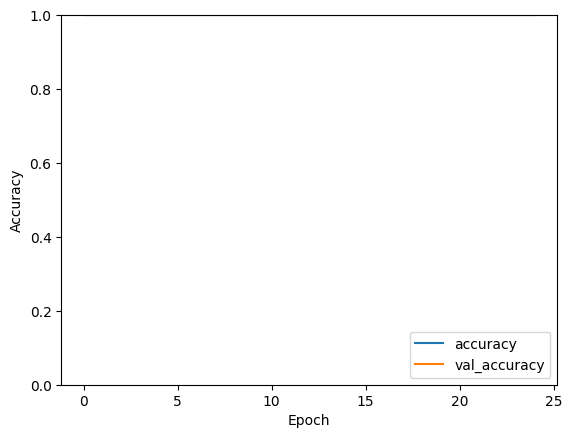

In [18]:
import matplotlib.pyplot as plt

# Evaluate the model
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {validation_accuracy*100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [21]:
test_generator = train_datagen.flow_from_directory(
    '/content/padang',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

Found 993 images belonging to 1 classes.
32/32 [==============================] - 10s 303ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 100.00%
